# Data Science and Business Analytics

# Task - 5 :  Exploratory Data Analysis : Sports (Indian Premier League)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams['figure.figsize']=(14,8)

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
matches_data = pd.read_csv('matches.csv')

In [4]:
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
matches_data.shape

(756, 18)

In [8]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
matches_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [8]:
# id_matches_data = matches_data[["id","season","winner"]]
# complete_data = deliveries_data.merge(id_matches_data,how='inner',left_on='match_id',right_on='id')

In [10]:
matches_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

### To predict in which stadium the match has occured how many times

In [50]:
stadium_venue=matches_data['venue'].value_counts()
stadium_venue

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

[Text(0, 0, 'Rajiv Gandhi International Stadium, Uppal'),
 Text(1, 0, 'Maharashtra Cricket Association Stadium'),
 Text(2, 0, 'Saurashtra Cricket Association Stadium'),
 Text(3, 0, 'Holkar Cricket Stadium'),
 Text(4, 0, 'M Chinnaswamy Stadium'),
 Text(5, 0, 'Wankhede Stadium'),
 Text(6, 0, 'Eden Gardens'),
 Text(7, 0, 'Feroz Shah Kotla'),
 Text(8, 0, 'Punjab Cricket Association IS Bindra Stadium, Mohali'),
 Text(9, 0, 'Green Park'),
 Text(10, 0, 'Punjab Cricket Association Stadium, Mohali'),
 Text(11, 0, 'Sawai Mansingh Stadium'),
 Text(12, 0, 'MA Chidambaram Stadium, Chepauk'),
 Text(13, 0, 'Dr DY Patil Sports Academy'),
 Text(14, 0, 'Newlands'),
 Text(15, 0, "St George's Park"),
 Text(16, 0, 'Kingsmead'),
 Text(17, 0, 'SuperSport Park'),
 Text(18, 0, 'Buffalo Park'),
 Text(19, 0, 'New Wanderers Stadium'),
 Text(20, 0, 'De Beers Diamond Oval'),
 Text(21, 0, 'OUTsurance Oval'),
 Text(22, 0, 'Brabourne Stadium'),
 Text(23, 0, 'Sardar Patel Stadium, Motera'),
 Text(24, 0, 'Barabati Stadi

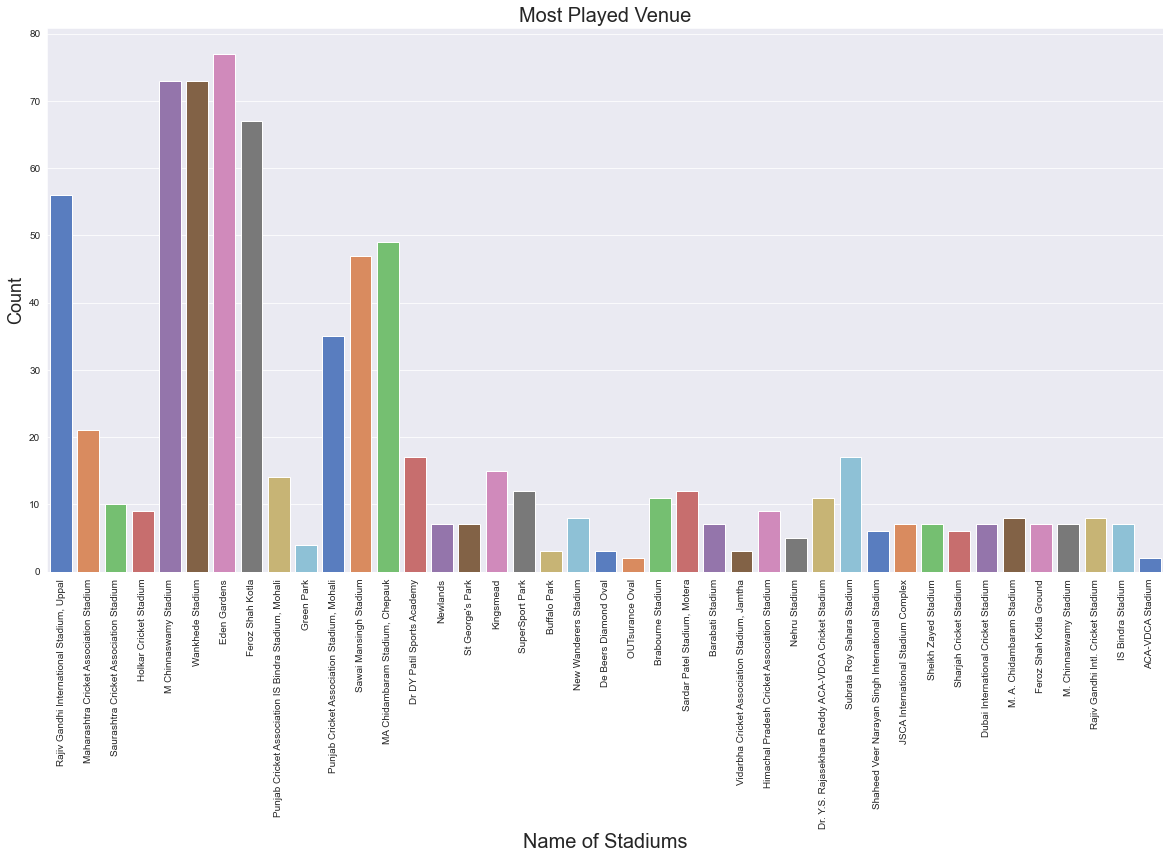

In [51]:
plt.figure(figsize=(20,10))
a=sns.countplot('venue',data=matches_data,palette='muted')
plt.title('Most Played Venue',fontsize=20)
plt.ylabel('Count',fontsize=18)
plt.xlabel('Name of Stadiums',fontsize=20)
a.set_xticklabels(a.get_xticklabels(),rotation=90)

Observation :
1. Eden Gardens stadium had the ost number of ipl matches and OUTsurance Oval and ACA-VDCA Stadium had the least number of matches.

In [52]:
# complete_data.columns.values

In [53]:
# matches_data.columns.values

In [54]:
# matches_data = matches_data.drop(columns=["umpire3"],axis=1)
# matches_data.head()

In [55]:
# winner_per_season = matches_data.groupby("season")["winner"].value_counts()
# winner_per_season

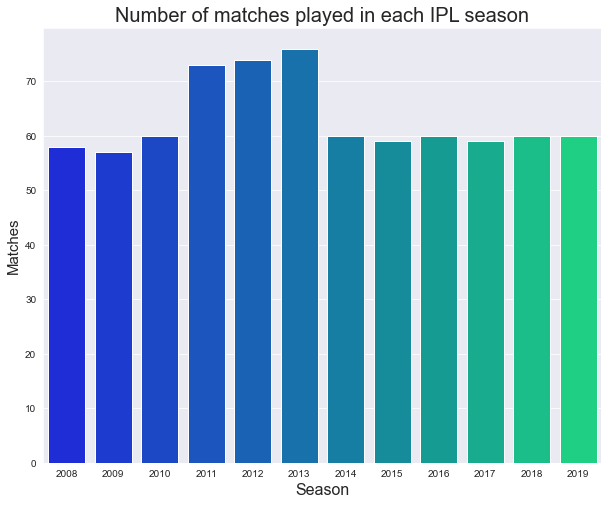

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(x='season',data=matches_data,palette="winter")
plt.title("Number of matches played in each IPL season",fontsize=20)
plt.xlabel("Season",fontsize=16)
plt.ylabel("Matches",fontsize=15)
plt.show()

### To find the number of matches won by each team of IPL

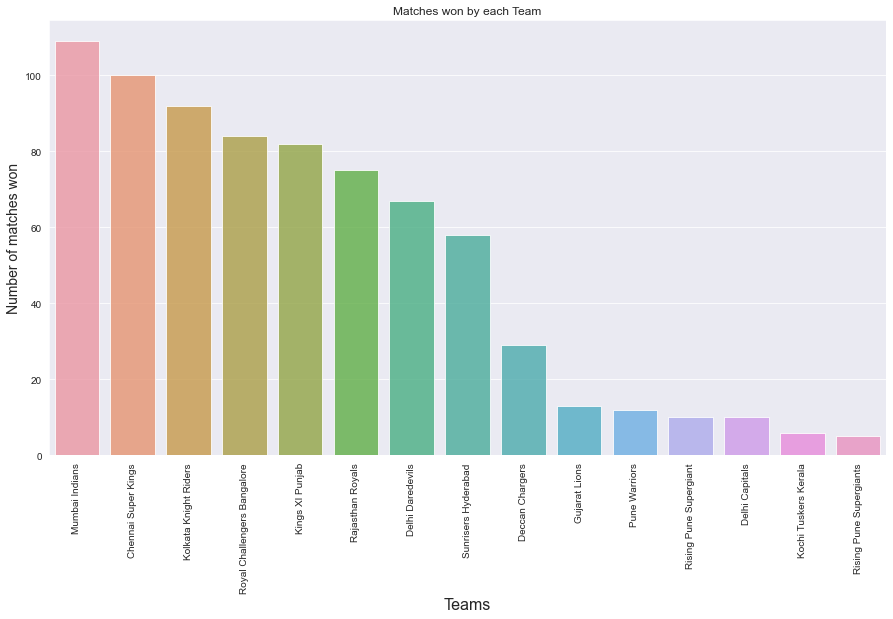

In [60]:
sns.set_style("darkgrid")
ls=matches_data['winner'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp=sns.barplot(ls.index,ls.values,alpha=0.8)
temp.set_xticklabels(temp.get_xticklabels(),rotation=90)
plt.title("Matches won by each Team")
plt.ylabel("Number of matches won",fontsize=14)
plt.xlabel("Teams",fontsize=16)
plt.show()

#### Observation:
##### 1.The maximum number of matches won by the team Mumbai Indians and the second highest number of matches is won by the team Chennai Super Kings

### Pair Plot

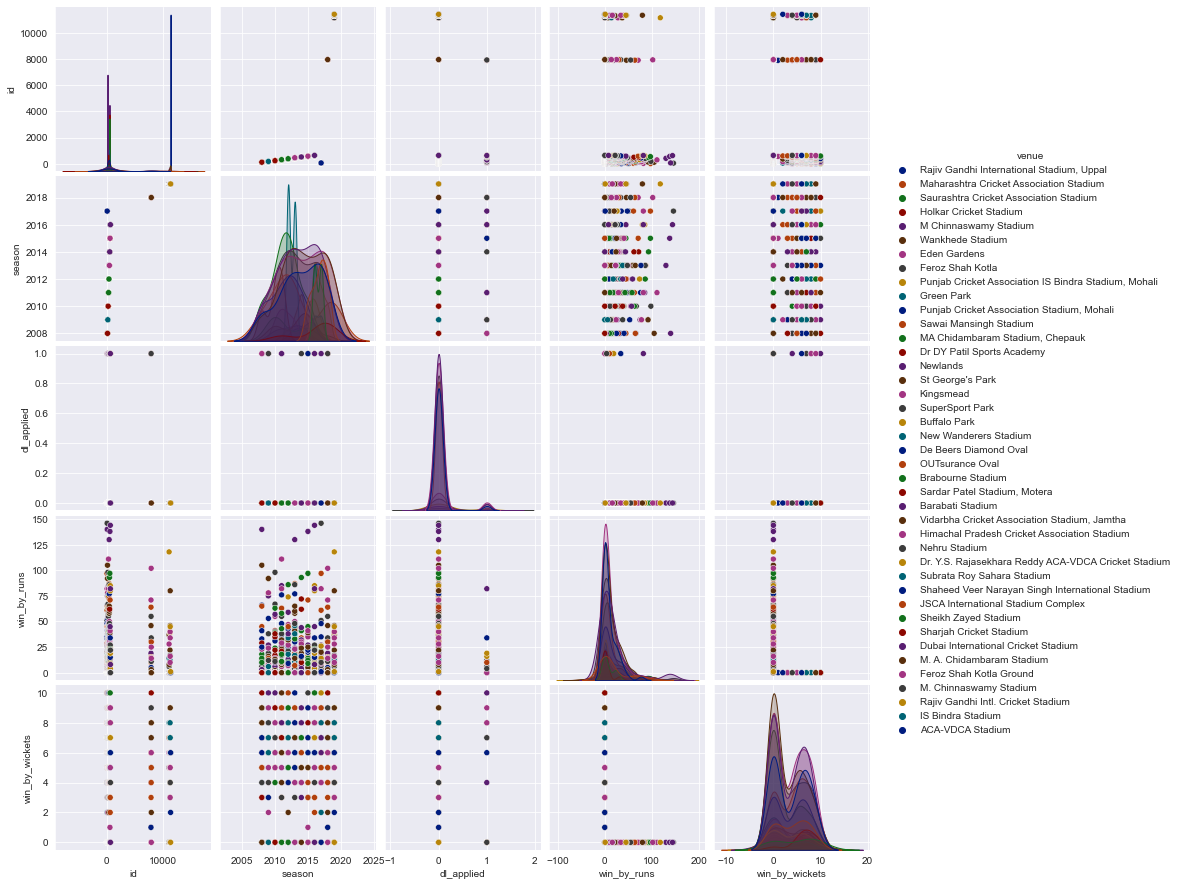

In [63]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(matches_data,hue='venue',palette='dark')

In [64]:
deliveries_data = pd.read_csv('deliveries.csv')
deliveries_data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [65]:
deliveries_data.shape

(179078, 21)

In [66]:
deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### Batsman Performance Analysis

In [68]:
a = deliveries_data.groupby(['batsman_runs','over']).count().reset_index()
a

,batsman_runs,over,match_id,inning,batting_team,bowling_team,ball,batsman,non_striker,bowler,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,0,1,5709,5709,5709,5709,5709,5709,5709,5709,...,5709,5709,5709,5709,5709,5709,5709,305,305,195
1,0,2,5221,5221,5221,5221,5221,5221,5221,5221,...,5221,5221,5221,5221,5221,5221,5221,344,344,241
2,0,3,4673,4673,4673,4673,4673,4673,4673,4673,...,4673,4673,4673,4673,4673,4673,4673,369,369,255
3,0,4,4510,4510,4510,4510,4510,4510,4510,4510,...,4510,4510,4510,4510,4510,4510,4510,380,380,275
4,0,5,4379,4379,4379,4379,4379,4379,4379,4379,...,4379,4379,4379,4379,4379,4379,4379,383,383,278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,7,9,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
140,7,10,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
141,7,18,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
142,7,19,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,0,0,0


In [69]:
a=a.pivot("batsman_runs","over","inning")
a

over,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
batsman_runs,,,,,,,,,,,,,,,,,,,,
0,5709.0,5221.0,4673.0,4510.0,4379.0,4317.0,3718.0,3420.0,3380.0,3231.0,3182.0,3012.0,3141.0,3051.0,2989.0,2819.0,2789.0,2648.0,2479.0,2177.0
1,2192.0,2231.0,2448.0,2525.0,2654.0,2727.0,4076.0,4206.0,4124.0,4216.0,4072.0,4221.0,4034.0,3938.0,3805.0,3791.0,3603.0,3389.0,3030.0,2241.0
2,354.0,349.0,418.0,411.0,393.0,375.0,499.0,531.0,550.0,634.0,653.0,602.0,665.0,657.0,670.0,740.0,703.0,718.0,777.0,772.0
3,35.0,59.0,53.0,42.0,45.0,25.0,29.0,27.0,20.0,17.0,20.0,24.0,24.0,26.0,25.0,18.0,19.0,25.0,20.0,34.0
4,1169.0,1393.0,1480.0,1520.0,1479.0,1485.0,725.0,773.0,814.0,783.0,821.0,838.0,762.0,836.0,929.0,848.0,981.0,960.0,919.0,877.0
5,10.0,9.0,8.0,10.0,5.0,10.0,1.0,2.0,3.0,2.0,2.0,1.0,3.0,3.0,2.0,NaN,4.0,3.0,1.0,NaN
6,134.0,236.0,335.0,361.0,390.0,386.0,235.0,294.0,339.0,300.0,370.0,392.0,444.0,467.0,480.0,545.0,549.0,643.0,638.0,632.0
7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,5.0


<AxesSubplot:xlabel='batsman_runs'>

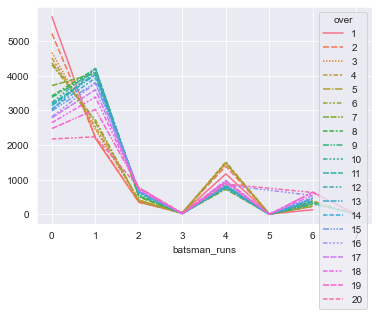

In [70]:
sns.lineplot(data=a)

In [ ]:
toss